In [1]:
from dask.distributed import Client
import dask
import matplotlib.pyplot as plt

import os
os.environ["MKL_NUM_THREADS"] = "1" 
os.environ["NUMEXPR_NUM_THREADS"] = "1" 
os.environ["OMP_NUM_THREADS"] = "1" 
import numpy as np

In [2]:
import os
os.chdir("/scratch/ak1774/runs")

In [3]:
client = Client(n_workers=10, threads_per_worker=1)

In [4]:
def set_up_worker():
    import os
    os.environ["MKL_NUM_THREADS"] = "1" 
    os.environ["NUMEXPR_NUM_THREADS"] = "1" 
    os.environ["OMP_NUM_THREADS"] = "1" 
    
client.run(set_up_worker);

In [5]:
%load_ext autoreload
%autoreload 2

In [6]:
from es_map import es_update
from es_map import distributed_evaluate
from es_map.interaction import interaction
from es_map import behavior_map
from es_map import novelty_archive
from es_map import map_elite_utils

In [7]:
config = {
    "env_id" : "DamageAnt-v2",
    "policy_args" : {
        "init" : "normc",
        "layers" :[256, 256],
       "activation" : 'tanh',
       "action_noise" : 0.01,
    },
    "env_args" : {
        "use_norm_obs" : True,
    },
    
    "ES_NUM_INITIAL_RANDOM_INDIVIDUALS_TO_POPULATE_MAP" : 20,
    
    "ES_NUM_GENERATIONS" : 1000,
    "ES_popsize" : 100,
    "ES_sigma" : 0.02,
    "ES_EVALUATION_BATCH_SIZE" : 5,
    "ES_lr" : 0.01,
    
    "ES_CENTRAL_NUM_EVALUATIONS" : 30,
    "ES_STEPS_UNTIL_NEW_PARENT_SELECTION" : 5,
    
    "GA_MAP_ELITES_NUM_GENERATIONS" : 1000,
    
    "GA_CHILDREN_PER_GENERATION" : 200,
    "GA_NUM_EVALUATIONS" : 10,
    
    "GA_MULTI_PARENT_MODE" : True,
    "GA_PARENT_SELECTION_MODE" : "rank_proportional",  # "uniform", "rank_proportional"
    "GA_RANK_PROPORTIONAL_SELECTION_AGRESSIVENESS" : 1.0,  # 0.0 uniform, 1.0 normal , higher more agressive
    "GA_MUTATION_POWER" : 0.02,
    
    "map_elites_grid_description" : {
        "bc_limits" : [[0,1],[0,1],[0,1],[0,1]],
        "grid_dims" : [6,6,6,6],
    },
    
    # BMAP settings
    "BMAP_type_and_metrics" : {
        "type" : "single_map",    # type can be: "single_map","multi_map","nd_sorted_map" 
        "metrics" : ["fitness"],    # metric can be: ["f"],["f",e], ["f,e,i"], etc... 
    },
    "ES_UPDATES_MODES_TO_USE" : ["fitness"],#"evolvability","innovation"], # list of updates to use
    "ES_PARENT_SELECTION_MODE" : "rank_proportional",  # "uniform", "rank_proportional"
    "ES_RANK_PROPORTIONAL_SELECTION_AGRESSIVENESS" : 1.0,  # 0.0 uniform, 1.0 normal , higher more agressive
    
    "NOVELTY_CALCULATION_NUM_NEIGHBORS" : 10,
    
    
    "CHECKPOINT_FREQUENCY" : 100,
    "PLOT_FREQUENCY" : 100,
}

In [8]:
wandb_logging = True
if wandb_logging is True:
    import wandb
    config
    #wandb.config = config
    wandb.init(project="evolvability_map_elites", entity="adam_katona")
    wandb.run.name = "me_es_test"
    wandb.run.config.update(config)

    run_name = wandb.run.dir.split("/")[-2]
    run_checkpoint_path = "/scratch/ak1774/runs/large_files/" + run_name
    os.makedirs(run_checkpoint_path,exist_ok=True)

wandb: Currently logged in as: adam_katona (use `wandb login --relogin` to force relogin)
wandb: wandb version 0.12.9 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


In [9]:
import itertools
        
def create_id_generator():
    counter = itertools.count()
    def get_next_id():
        return next(counter)
    return get_next_id
    
get_next_individual_id = create_id_generator()

In [10]:
####################
## SINGLE MAP ######
####################

In [28]:
import numpy as np

[autoreload of es_map.es_map_elites failed: Traceback (most recent call last):
  File "/scratch/ak1774/vargpu_env/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/scratch/ak1774/vargpu_env/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/usr/lib/python3.8/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/usr/lib/python3.8/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 604, in _exec
  File "<frozen importlib._bootstrap_external>", line 848, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/home/userfs/a/ak1774/workspace/evolvability_map_elites/evolvability_map_elites/es_map/es_map_elites.py", line 9, in <module>
    from es_map import nd_sort
  File "/home/userfs/a/ak1774/wor

In [29]:
np.sum([])

0.0

In [32]:
a = np.ones([3,4,4])

In [34]:
def f(x):
    if x is None:
        return 2
    else:
        return x+1
vf = np.vectorize(f)

In [35]:
vf(a)

array([[[2., 2., 2., 2.],
        [2., 2., 2., 2.],
        [2., 2., 2., 2.],
        [2., 2., 2., 2.]],

       [[2., 2., 2., 2.],
        [2., 2., 2., 2.],
        [2., 2., 2., 2.],
        [2., 2., 2., 2.]],

       [[2., 2., 2., 2.],
        [2., 2., 2., 2.],
        [2., 2., 2., 2.],
        [2., 2., 2., 2.]]])

In [39]:
np.ceil(np.sqrt(1000))

32.0

In [43]:
a = np.array([None]*6)

In [44]:
a[:3] = np.array([1,2,3])

In [51]:
a1 = [1,2]
a = [3,3,5]
a1 in []
        

False

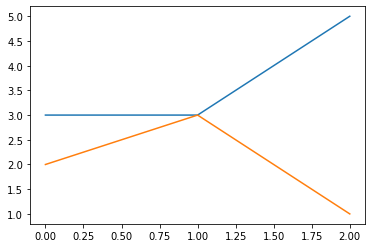

In [53]:
fig,ax = plt.subplots()
ax.plot(a)
ax.plot([2,3,1])

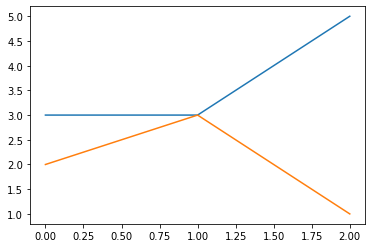

In [54]:
fig

In [23]:
a = [1,2,3,4]

[autoreload of es_map.es_map_elites failed: Traceback (most recent call last):
  File "/scratch/ak1774/vargpu_env/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/scratch/ak1774/vargpu_env/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/usr/lib/python3.8/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/usr/lib/python3.8/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 604, in _exec
  File "<frozen importlib._bootstrap_external>", line 844, in exec_module
  File "<frozen importlib._bootstrap_external>", line 981, in get_code
  File "<frozen importlib._bootstrap_external>", line 911, in source_to_code
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/home/userfs/a/ak1774/workspace/evolvabili

In [26]:
a[:7]

[1, 2, 3, 4]

In [27]:
np.stack([[1,2],[3,4]])

array([[1, 2],
       [3, 4]])

In [56]:
import torch

In [87]:
a = torch.randn(3)
a1 = torch.nn.Parameter(a.clone())
a2 = torch.nn.Parameter(a.clone())
sgd = torch.optim.SGD([a1],lr=0.01)
adam = torch.optim.Adam([a1],lr=0.01)

In [89]:
grad = torch.randn(3)
a1.grad = grad.clone()
a2.grad = grad.clone()
sgd.step()
print(a1)
adam.step()
print(a2)

Parameter containing:
tensor([-1.1662, -0.3570, -1.0755], requires_grad=True)
Parameter containing:
tensor([-1.1727, -0.3439, -1.0945], requires_grad=True)


Parameter containing:
tensor([-1.7781, -1.6267,  0.4675], requires_grad=True)
Parameter containing:
tensor([-1.7781, -1.6267,  0.4675], requires_grad=True)


In [78]:
optim.load_state_dict(optim.state_dict())

In [79]:
optim.state_dict()

{'state': {0: {'step': 1,
   'exp_avg': tensor([-1.0497e-01,  1.0641e-01, -2.6047e-02, -2.3925e-02, -3.2195e-02,
            1.5132e-01,  1.3294e-01,  7.1574e-02,  1.6160e-01, -2.9640e-02,
           -7.2179e-03,  1.9616e-01, -9.8143e-02, -3.5410e-02,  2.7050e-02,
           -2.0221e-01,  1.3035e-02, -1.3770e-01,  1.1939e-01,  1.7022e-01,
            3.7447e-02, -6.0189e-02, -2.7245e-02, -1.4125e-02, -1.6534e-01,
           -6.6010e-02, -5.9216e-02, -3.8937e-02,  1.5546e-01, -2.9956e-02,
            1.7500e-01, -1.2481e-01,  2.0378e-01, -1.0554e-01, -9.6572e-02,
           -5.7930e-02,  4.4368e-02,  2.3544e-02,  1.9907e-02,  1.4801e-01,
           -5.9930e-02, -2.8463e-02,  2.8150e-02, -9.5624e-02, -1.5445e-01,
           -4.1884e-02, -9.7244e-02,  6.0231e-02,  8.9551e-02,  4.1776e-02,
           -2.2697e-02, -9.7762e-02, -1.2364e-01, -5.7126e-02,  3.9547e-02,
            4.3314e-02, -1.0980e-02, -1.8337e-03,  1.2950e-01,  2.0477e-02,
            1.1682e-01, -1.4747e-01, -7.7606e-02, -

In [8]:
def select_parent_es_me(non_empty_cells,config,selection_metric):
    if len(non_empty_cells) == 0:
            parent_cell = None
            parent_params = get_random_individual(config)
            parent_obs_mean = None
            parent_obs_std = None
            
    else:
        if config["ES_PARENT_SELECTION_MODE"] == "uniform":
            parent_cell = np.random.choice(non_empty_cells)  # NOTE, here goes cell selection method
        elif config["ES_PARENT_SELECTION_MODE"] == "rank_proportional":
            sorted_cells = sorted(non_empty_cells,key=lambda x : x["selection_metric"])                
            selected_index = rank_based_selection(num_parent_candidates=len(sorted_cells),
                                                     num_children=None, # only want a single parent
                                                     agressiveness=config["GA_RANK_PROPORTIONAL_SELECTION_AGRESSIVENESS"])
            parent_cell = sorted_cells[selected_index]

        else:
            raise "NOT IMPLEMENTED"

    return parent_cell

In [ ]:
DEBUG = False
if DEBUG is True:
    config["ES_NUM_GENERATIONS"] = 30
    config["ES_popsize"] = 20
    config["ES_CENTRAL_NUM_EVALUATIONS"] = 4
    

b_archive = novelty_archive.NoveltyArchive(bc_dim = len(config["map_elites_grid_description"]["grid_dims"]))
    
run_name = wandb.run.dir.split("/")[-2]
run_checkpoint_path = "/scratch/ak1774/runs/large_files/" + run_name

evaluations_per_generation = config["ES_popsize"] + config["ES_CENTRAL_NUM_EVALUATIONS"] 
B_MAP_TYPE = config["BMAP_type_and_metrics"][0]
B_MAP_METRICS = config["BMAP_type_and_metrics"][1]

generation_number = 0
evaluations_so_far = 0
best_fitness_so_far = 0
best_model_so_far = None
    

# there are several kinds of modes
# selection mode (which type of parent we select (this one is only available for multi map))
# update mode (which type of es update we do)
# archive mode (which type of map we try to insert it to (only available for multi map))
    
# MODES Summary
# I decided not to have selection mode, we select with uniform prob from each map 
# (this would be only be relevent if we want to have different update probabilities for parents from different maps)
# I decided not to have archive mode, we try to archive into all the maps

    
if B_MAP_TYPE == "single_map" or B_MAP_TYPE == "nd_sorted_map":
    b_map = behavior_map.Grid_behaviour_map(config)
    while True
        if generation_number >= config["ES_NUM_GENERATIONS"]:
            print("Done, reached iteration: ",config["ES_NUM_GENERATIONS"])
            break
            
        
    
        non_empty_cells = b_map.get_non_empty_cells(config)
        if len(non_empty_cells) == 0: # no parent available
            parent = None # TODO prepare new individual NOTE this should be different because we want to evaluate the parent not the child here
        
            # evaluate new individual
            # can also calculate children to get evolvability and innovation
        
        
        
        else:
            if B_MAP_TYPE == "single_map":
                # select parent cell
                selection_metric = "eval_fitness"
                selected_parent_cell = select_parent_es_me(non_empty_cells,config,selection_metric)
                parent = selected_parent_cell["elite"]

            elif B_MAP_TYPE == "nd_sorted_map":
                # select parent cell
                # for slectinf cells with nd sorted map, we cannot simply use a metric.
                # ech cell contains a tradeoff between objectives
                # let us do uniform selection from each cell
                parent_cell = np.random.choice(non_empty_cells)
                
                # now let us select an individual form the non dominated front of elites in the cell
                parent = np.random.choice(parent_cell["elites"])


        
        
        # decide on update mode (explore,exploit,build_evolvability)
        es_update_mode = np.random.choice(config["ES_UPDATES_MODES_TO_USE"])
    
    
    
    
    
elif B_MAP_TYPE == "multi_map":
    b_map = behavior_map.Grid_behaviour_multi_map(config)
    while True:
        if generation_number >= config["ES_NUM_GENERATIONS"]:
            print("Done, reached iteration: ",config["ES_NUM_GENERATIONS"])
            break
        
            # Decide on selection mode (which map we select a parent from) Should we just do uniform from ech map?
            # Should which update we do depend on which map we select the parent from?
            
            # Decide on update mode (it makes sense to mix this up, eg we want to use the evolvable parent to find fit child)
            # Decide on archive mode (for fitness we can always test archiving, for innov and evolvability, we need a new evaluation to evaluate)
            # once we do the new evaluation, we can try to archive it into all the maps
        
            non_empty_cells = b_map.get_non_empty_cells(config)
        
        
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    generation_number += 1


In [ ]:
####################
## ND SORTED MAP ###
####################

In [ ]:
b_map = behavior_map.Grid_behaviour_map(config)
while True:
    if generation_number >= config["ES_NUM_GENERATIONS"]:
        print("Done, reached iteration: ",config["ES_NUM_GENERATIONS"])
        break

In [ ]:
####################
## MULTI MAP #######
####################

In [ ]:
b_map = behavior_map.Grid_behaviour_map(config)
while True:
    if generation_number >= config["ES_NUM_GENERATIONS"]:
        print("Done, reached iteration: ",config["ES_NUM_GENERATIONS"])
        break
        

In [5]:
config["BMAP_type_and_metrics"] = [
    "multi_map",
    ["f","e"],
]

In [16]:
b_map = behavior_map.create_b_map_grid(config)

In [7]:
b_map

In [ ]:
    "BMAP_type_and_metrics" : ["single_map",    # type can be: "single_map","multi_map","nd_sorted_map" 
                               ["fitness"]],    # metric can be: ["f"],["f",e], ["f,e,i"], etc... 

In [17]:
b_map.data[1,4,3,5,2] = 19

In [18]:
b_map.get_non_empty_cells(config,metric="e")

array([19], dtype=object)

In [21]:
b_map.get_cell_coords(bc=[0.5,0.5,0.5,0.5,],config=config,metric="f")

[0, 3, 3, 3, 3]

In [20]:
behavior_map._get_cell_coords([0.5,0.5,0.5,0.5,],config)

(3, 3, 3, 3)